In [1]:
import networkx as nx
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
import scipy
import matplotlib.pyplot as plt 


In [27]:
bodyData = pd.read_csv("soc-redditHyperlinks-body.tsv", sep='\t')
titleData = pd.read_csv("soc-redditHyperlinks-title.tsv", sep='\t')
df = bodyData.append(titleData, ignore_index=True)
del df['PROPERTIES']

In [28]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1


In [29]:
df.columns

Index(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP',
       'LINK_SENTIMENT'],
      dtype='object')

In [109]:
grouped_df =  df[['SOURCE_SUBREDDIT','TARGET_SUBREDDIT','LINK_SENTIMENT']]
df2 = grouped_df.groupby(
     ['SOURCE_SUBREDDIT','TARGET_SUBREDDIT']
 ).agg(
     SENTIMENT_SUM = ('LINK_SENTIMENT','sum')
 ).reset_index()


In [110]:
df2['SENTIMENT_SUM_ABS'] = abs(df2['SENTIMENT_SUM'])
df2 = df2.sort_values('SENTIMENT_SUM_ABS',ascending=False).reset_index(drop=True)

In [108]:
%%time
# Getting 50000 edges 
df3=pd.DataFrame()
for i in range(len(df2)):
    n1 = df2.iloc[i]['SOURCE_SUBREDDIT']
    n2 = df2.iloc[i]['TARGET_SUBREDDIT']
    temp = df.loc[(df['SOURCE_SUBREDDIT'] == n1) & (df['TARGET_SUBREDDIT'] == n2)]
    df3 = df3.append(temp,ignore_index=True)
    if len(df3) >= 50000:
        print(i)
        print(len(df3))
        break

298
50093
Wall time: 36.6 s


In [120]:
df3['TIMESTAMP'] = pd.to_datetime(df3.TIMESTAMP)

In [122]:
df3 = df3.sort_values('TIMESTAMP',ascending=True).reset_index(drop=True)

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT
0,switcharoo,funny,1u58e6s,2013-12-31 19:35:24,1
1,programmingcirclejerk,programming,1u6yeos,2014-01-01 04:58:12,1
2,shitamericanssay,askreddit,1u645bs,2014-01-01 09:46:35,1
3,notcirclejerk,atheism,1u66o3s,2014-01-01 10:16:54,1
4,bestof,movies,1u69w0s,2014-01-01 11:39:00,1
...,...,...,...,...,...
50088,enoughlibertarianspam,anarcho_capitalism,68i03ks,2017-04-30 13:38:19,1
50089,ecr_eu,electronic_cigarette,68gug8s,2017-04-30 14:09:37,1
50090,bestof,askhistorians,68i03bs,2017-04-30 14:51:21,1
50091,beetlejuicing,askreddit,68i4qms,2017-04-30 15:02:20,1


In [139]:
df3.to_csv('Sentiment Weighted Sum.csv',index=False)

In [123]:
G = nx.from_pandas_edgelist(df3,source='SOURCE_SUBREDDIT', target='TARGET_SUBREDDIT', edge_attr=['LINK_SENTIMENT'], create_using=nx.MultiDiGraph())

In [124]:
print(nx.info(G))

Name: 
Type: MultiDiGraph
Number of nodes: 316
Number of edges: 50093
Average in degree: 158.5222
Average out degree: 158.5222


In [125]:
nx.number_strongly_connected_components(G)

307

In [126]:
nx.number_weakly_connected_components(G)

101

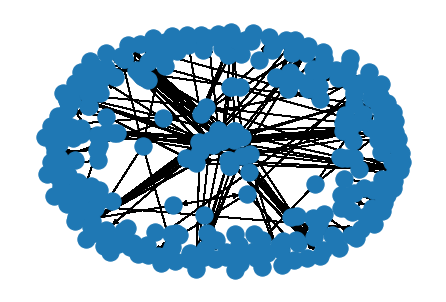

In [127]:
nx.draw(G)

In [128]:
df2_neg = df2.loc[df2['SENTIMENT_SUM']<0]


In [129]:
df2_neg.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,SENTIMENT_SUM,SENTIMENT_SUM_ABS
2672,hearthstone,hearthstonecirclejerk,-25,25
3240,angryblackladies,blackladies,-22,22
5656,drama,news,-15,15
6522,publichealthwatch,abortion,-13,13
6661,drama,videos,-13,13


In [141]:
%%time
# Getting 50000 edges 

df4=pd.DataFrame()
for i in range(len(df2_neg)):
    n1 = df2_neg.iloc[i]['SOURCE_SUBREDDIT']
    n2 = df2_neg.iloc[i]['TARGET_SUBREDDIT']
    temp = df.loc[(df['SOURCE_SUBREDDIT'] == n1) & (df['TARGET_SUBREDDIT'] == n2)]
    df4 = df4.append(temp,ignore_index=True)
    if len(df4) >= 50000:
        print(i)
        print(len(df4))
        break

Wall time: 42min 56s


In [142]:
len(df4)

27019

In [144]:
df4['TIMESTAMP'] = pd.to_datetime(df4.TIMESTAMP)
df4 = df4.sort_values('TIMESTAMP',ascending=True).reset_index(drop=True)

In [145]:
df4.to_csv('Sentiment Weighted Negative Sum.csv',index=False)

In [146]:
G2 = nx.from_pandas_edgelist(df4,source='SOURCE_SUBREDDIT', target='TARGET_SUBREDDIT', edge_attr=['LINK_SENTIMENT'], create_using=nx.MultiDiGraph())

In [149]:
print(nx.info(G2))

Name: 
Type: MultiDiGraph
Number of nodes: 9401
Number of edges: 27019
Average in degree:   2.8741
Average out degree:   2.8741


In [150]:
nx.number_strongly_connected_components(G2)

7826

In [151]:
nx.number_weakly_connected_components(G2)

486